### Feature engineering Dataset

In [2]:
import pandas as pd

file_path = "feature_engineered_wildfire_dataset.csv" 
dataset = pd.read_csv(file_path)

print(dataset.info())
print(dataset.head())

/var/folders/t8/5qy83krd04n96dc5kqzjmrch0000gn/T/ipykernel_89087/4044806317.py:4: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 45 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   OBJECTID                      int64  
 1   FOD_ID                        int64  
 2   SOURCE_SYSTEM_TYPE            object 
 3   SOURCE_SYSTEM                 object 
 4   NWCG_REPORTING_AGENCY         object 
 5   NWCG_REPORTING_UNIT_ID        object 
 6   NWCG_REPORTING_UNIT_NAME      object 
 7   SOURCE_REPORTING_UNIT         object 
 8   SOURCE_REPORTING_UNIT_NAME    object 
 9   LOCAL_INCIDENT_ID             object 
 10  FIRE_CODE                     object 
 11  FIRE_NAME                     object 
 12  ICS_209_PLUS_COMPLEX_JOIN_ID  object 
 13  MTBS_FIRE_NAME                object 
 14  COMPLEX_NAME                  object 
 15  FIRE_YEAR                     int64  
 16  DISCOVERY_DATE                object 
 17  DISCOVERY_DOY                 int64  
 18  DISCOVERY_TIME        

In [4]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# creating diff columns for categorical and numerical values
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

dataset[numerical_columns] = imputer_num.fit_transform(dataset[numerical_columns])
dataset[categorical_columns] = imputer_cat.fit_transform(dataset[categorical_columns])

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoders = {}
for col in categorical_columns:
    dataset[col] = dataset[col].astype(str)  # Convert all categorical columns to strings
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
dataset.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_YEAR,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION,DISCOVERY_DAY,DISCOVERY_WEEKDAY,IS_WEEKEND,AVG_FIRE_SIZE,TOTAL_FIRES,FIRE_SEVERITY,FIRE_SIZE_TO_DURATION
0,1.0,1.0,0,2,5,344,1503,888,3743,889571,30120,270833,1086,9272,919,2005.0,4781,33.0,1300.0,0,9,1,4773,33.0,1730.0,0.10,0,40.036944,-121.005833,16,4,340,6063.0,1292,2005.0,2.0,3,0.0,2.0,2.0,0.0,83.082573,251881.0,2,0.100000
1,2.0,2.0,0,2,5,293,583,873,1469,103925,17838,542505,1086,9272,919,2004.0,4515,133.0,845.0,2,7,1,4507,133.0,1530.0,0.25,0,38.933056,-120.404444,16,4,337,6061.0,1289,2004.0,5.0,1,0.0,12.0,2.0,0.0,83.082573,251881.0,2,0.250000
2,3.0,3.0,0,2,5,293,583,873,1469,27981,12105,608102,1086,9272,919,2004.0,4534,152.0,1921.0,0,1,1,4526,152.0,2024.0,0.10,0,38.984167,-120.735556,13,4,157,6017.0,527,2004.0,5.0,1,0.0,31.0,0.0,0.0,83.082573,251881.0,2,0.100000
3,4.0,4.0,0,2,5,293,583,873,1469,414995,59061,226019,1086,9272,919,2004.0,4562,180.0,1600.0,2,7,1,4559,185.0,1400.0,0.10,0,38.559167,-119.913333,16,4,257,6003.0,31,2004.0,6.0,2,5.0,28.0,0.0,0.0,83.082573,251881.0,2,0.016667
4,5.0,5.0,0,2,5,293,583,873,1469,451497,59061,626258,1086,9272,919,2004.0,4562,180.0,1600.0,2,7,1,4559,185.0,1200.0,0.10,0,38.559167,-119.933056,16,4,257,6003.0,31,2004.0,6.0,2,5.0,28.0,0.0,0.0,83.082573,251881.0,2,0.016667


In [9]:
# Drop unnecessary columns
columns_to_drop = [
    'OBJECTID', 'FOD_ID'
]
dataset = dataset.drop(columns=columns_to_drop, axis=1)

In [10]:
dataset.head()

,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_YEAR,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION,DISCOVERY_DAY,DISCOVERY_WEEKDAY,IS_WEEKEND,AVG_FIRE_SIZE,TOTAL_FIRES,FIRE_SEVERITY,FIRE_SIZE_TO_DURATION
0,0,2,5,344,1503,888,3743,889571,30120,270833,1086,9272,919,2005.0,4781,33.0,1300.0,0,9,1,4773,33.0,1730.0,0.10,0,40.036944,-121.005833,16,4,340,6063.0,1292,2005.0,2.0,3,0.0,2.0,2.0,0.0,83.082573,251881.0,2,0.100000
1,0,2,5,293,583,873,1469,103925,17838,542505,1086,9272,919,2004.0,4515,133.0,845.0,2,7,1,4507,133.0,1530.0,0.25,0,38.933056,-120.404444,16,4,337,6061.0,1289,2004.0,5.0,1,0.0,12.0,2.0,0.0,83.082573,251881.0,2,0.250000
2,0,2,5,293,583,873,1469,27981,12105,608102,1086,9272,919,2004.0,4534,152.0,1921.0,0,1,1,4526,152.0,2024.0,0.10,0,38.984167,-120.735556,13,4,157,6017.0,527,2004.0,5.0,1,0.0,31.0,0.0,0.0,83.082573,251881.0,2,0.100000
3,0,2,5,293,583,873,1469,414995,59061,226019,1086,9272,919,2004.0,4562,180.0,1600.0,2,7,1,4559,185.0,1400.0,0.10,0,38.559167,-119.913333,16,4,257,6003.0,31,2004.0,6.0,2,5.0,28.0,0.0,0.0,83.082573,251881.0,2,0.016667
4,0,2,5,293,583,873,1469,451497,59061,626258,1086,9272,919,2004.0,4562,180.0,1600.0,2,7,1,4559,185.0,1200.0,0.10,0,38.559167,-119.933056,16,4,257,6003.0,31,2004.0,6.0,2,5.0,28.0,0.0,0.0,83.082573,251881.0,2,0.016667


In [11]:
columns_to_drop = ['NWCG_REPORTING_UNIT_ID', 'LOCAL_INCIDENT_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID','ICS_209_PLUS_INCIDENT_JOIN_ID']
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

In [12]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 40 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SOURCE_SYSTEM_TYPE          int64  
 1   SOURCE_SYSTEM               int64  
 2   NWCG_REPORTING_AGENCY       int64  
 3   NWCG_REPORTING_UNIT_NAME    int64  
 4   SOURCE_REPORTING_UNIT       int64  
 5   SOURCE_REPORTING_UNIT_NAME  int64  
 6   FIRE_CODE                   int64  
 7   FIRE_NAME                   int64  
 8   MTBS_FIRE_NAME              int64  
 9   COMPLEX_NAME                int64  
 10  FIRE_YEAR                   float64
 11  DISCOVERY_DATE              int64  
 12  DISCOVERY_DOY               float64
 13  DISCOVERY_TIME              float64
 14  NWCG_CAUSE_CLASSIFICATION   int64  
 15  NWCG_GENERAL_CAUSE          int64  
 16  NWCG_CAUSE_AGE_CATEGORY     int64  
 17  CONT_DATE                   int64  
 18  CONT_DOY                    float64
 19  CONT_TIME            


Correlation Matrix


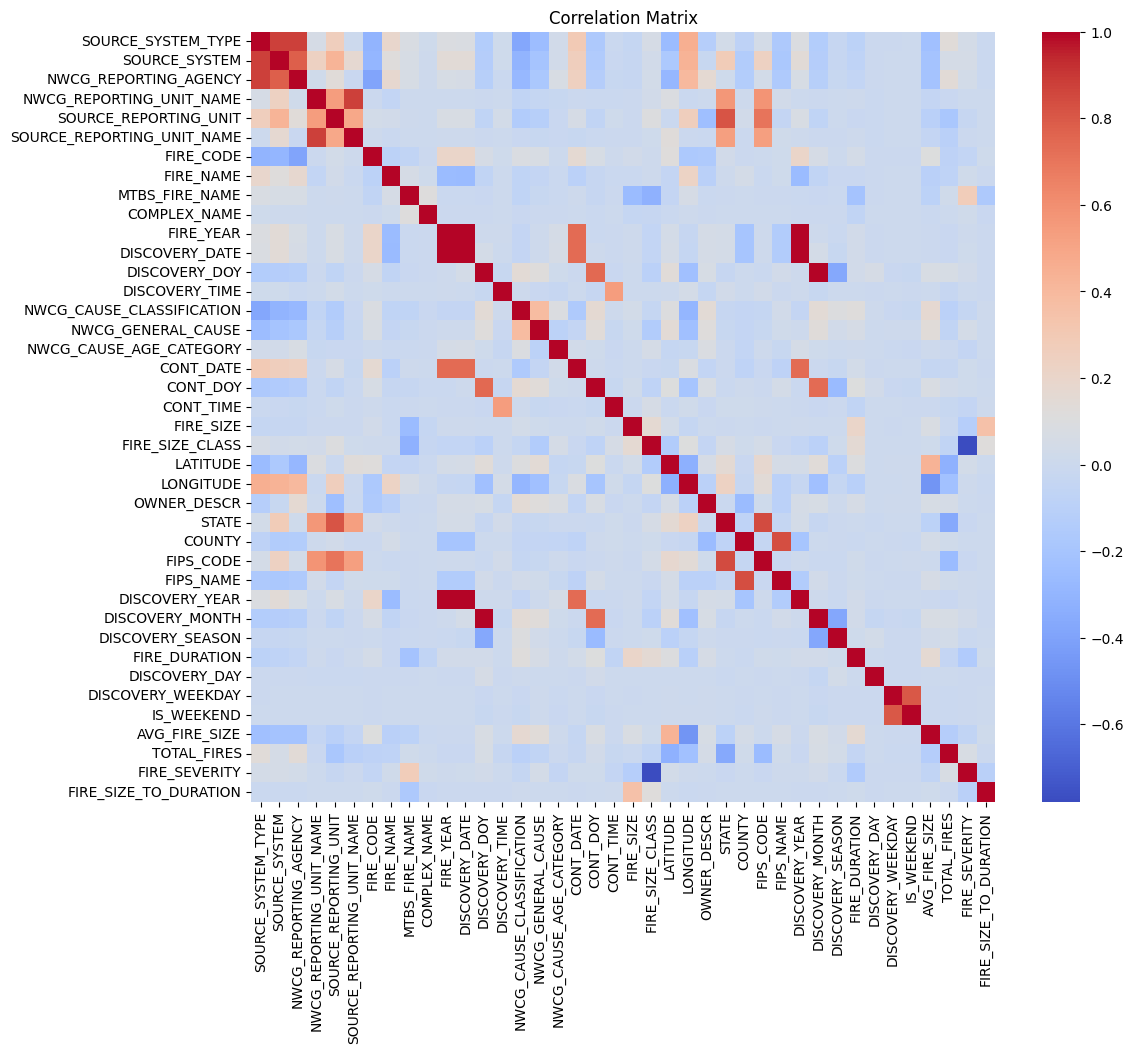

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCorrelation Matrix")
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [14]:
correlation_threshold = 0.1
correlation_with_target = correlation_matrix['FIRE_SIZE']

# Sort the correlations in descending order
sorted_corr_with_target = correlation_with_target.sort_values(ascending=False)

low_corr_features = sorted_corr_with_target[abs(sorted_corr_with_target) < correlation_threshold].index
print(f"Low correlated features with FIRE_SIZE (sorted by correlation): {list(low_corr_features)}")

print("\nFull sorted correlation with FIRE_SIZE:")
print(sorted_corr_with_target)


Low correlated features with FIRE_SIZE (sorted by correlation): ['AVG_FIRE_SIZE', 'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', 'FIRE_CODE', 'CONT_DOY', 'NWCG_GENERAL_CAUSE', 'DISCOVERY_DATE', 'DISCOVERY_YEAR', 'FIRE_YEAR', 'DISCOVERY_SEASON', 'DISCOVERY_DOY', 'DISCOVERY_MONTH', 'NWCG_CAUSE_AGE_CATEGORY', 'FIPS_NAME', 'OWNER_DESCR', 'DISCOVERY_DAY', 'DISCOVERY_TIME', 'COUNTY', 'IS_WEEKEND', 'CONT_DATE', 'DISCOVERY_WEEKDAY', 'FIPS_CODE', 'CONT_TIME', 'SOURCE_REPORTING_UNIT_NAME', 'STATE', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'TOTAL_FIRES', 'FIRE_NAME', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'SOURCE_SYSTEM_TYPE', 'LONGITUDE', 'COMPLEX_NAME']

Full sorted correlation with FIRE_SIZE:
FIRE_SIZE                     1.000000
FIRE_SIZE_TO_DURATION         0.352252
FIRE_DURATION                 0.204510
FIRE_SIZE_CLASS               0.165023
AVG_FIRE_SIZE                 0.078782
NWCG_CAUSE_CLASSIFICATION     0.035786
LATITUDE                      0.035736
FIRE_CODE               

In [15]:
correlation_threshold = 0.002
correlation_with_target = correlation_matrix['FIRE_SIZE']

low_corr_features = correlation_with_target[abs(correlation_with_target) < correlation_threshold].index
print(f"Low correlated features with FIRE_SIZE: {list(low_corr_features)}")

Low correlated features with FIRE_SIZE: ['DISCOVERY_TIME', 'CONT_DATE', 'CONT_TIME', 'COUNTY', 'FIPS_CODE', 'DISCOVERY_DAY', 'DISCOVERY_WEEKDAY', 'IS_WEEKEND']


In [16]:
dataset = dataset.drop(columns=low_corr_features)

In [17]:
correlation_with_target = correlation_matrix['FIRE_SIZE']

# Filter out negative correlations
positive_corr_features = correlation_with_target[correlation_with_target >= 0].index
print(f"Features with non-negative correlation with FIRE_SIZE: {list(positive_corr_features)}")


Features with non-negative correlation with FIRE_SIZE: ['FIRE_CODE', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'OWNER_DESCR', 'COUNTY', 'FIPS_NAME', 'DISCOVERY_YEAR', 'DISCOVERY_MONTH', 'DISCOVERY_SEASON', 'FIRE_DURATION', 'DISCOVERY_DAY', 'IS_WEEKEND', 'AVG_FIRE_SIZE', 'FIRE_SIZE_TO_DURATION']


In [20]:
positive_corr_features

Index(['FIRE_CODE', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'OWNER_DESCR', 'COUNTY', 'FIPS_NAME',
       'DISCOVERY_YEAR', 'DISCOVERY_MONTH', 'DISCOVERY_SEASON',
       'FIRE_DURATION', 'DISCOVERY_DAY', 'IS_WEEKEND', 'AVG_FIRE_SIZE',
       'FIRE_SIZE_TO_DURATION'],
      dtype='object')

In [21]:
# Identify columns present in both dataset and positive_corr_features
missing_columns = [col for col in positive_corr_features if col not in dataset.columns]
print(f"Missing columns: {missing_columns}")

# Remove missing columns from positive_corr_features
valid_corr_features = [col for col in positive_corr_features if col in dataset.columns]
dataset = dataset[valid_corr_features]


Missing columns: ['DISCOVERY_TIME', 'CONT_DATE', 'COUNTY', 'DISCOVERY_DAY', 'IS_WEEKEND']



Correlation Matrix


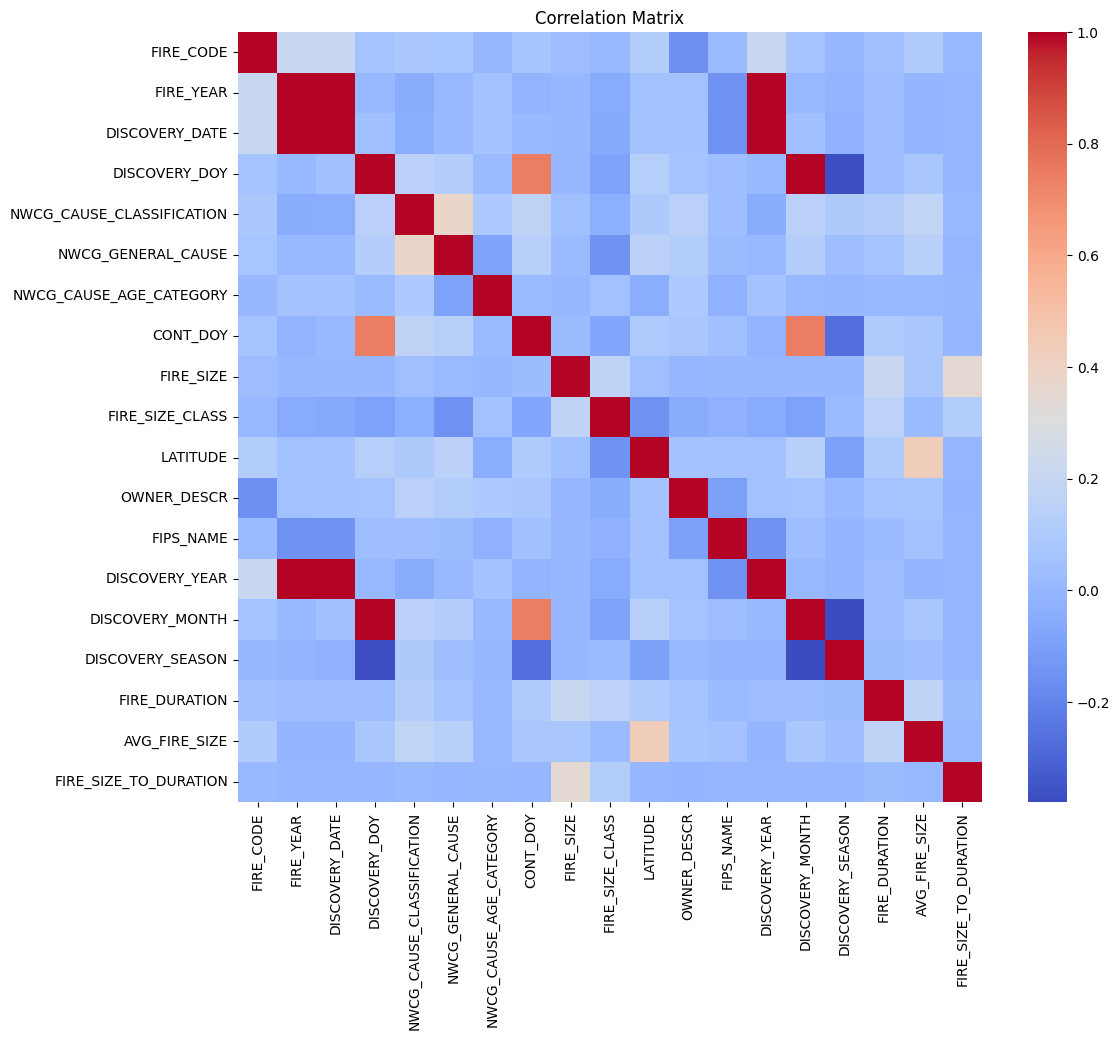

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCorrelation Matrix")
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [24]:
dataset.head()

,FIRE_CODE,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,OWNER_DESCR,FIPS_NAME,DISCOVERY_YEAR,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION,AVG_FIRE_SIZE,FIRE_SIZE_TO_DURATION
0,30120,2005.0,4781,33.0,0,9,1,33.0,0.10,0,40.036944,16,1292,2005.0,2.0,3,0.0,83.082573,0.100000
1,17838,2004.0,4515,133.0,2,7,1,133.0,0.25,0,38.933056,16,1289,2004.0,5.0,1,0.0,83.082573,0.250000
2,12105,2004.0,4534,152.0,0,1,1,152.0,0.10,0,38.984167,13,527,2004.0,5.0,1,0.0,83.082573,0.100000
3,59061,2004.0,4562,180.0,2,7,1,185.0,0.10,0,38.559167,16,31,2004.0,6.0,2,5.0,83.082573,0.016667
4,59061,2004.0,4562,180.0,2,7,1,185.0,0.10,0,38.559167,16,31,2004.0,6.0,2,5.0,83.082573,0.016667


In [25]:
dataset.to_csv("final_csv_sorted.csv")

In [26]:
print("Columns in dataset:", dataset.columns)

# Check which numerical columns are being selected
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_columns)

# Ensure all columns in numerical_columns exist in the dataset
missing_columns = [col for col in numerical_columns if col not in dataset.columns]
print("Missing columns:", missing_columns)

Columns in dataset: Index(['FIRE_CODE', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'OWNER_DESCR', 'FIPS_NAME', 'DISCOVERY_YEAR',
       'DISCOVERY_MONTH', 'DISCOVERY_SEASON', 'FIRE_DURATION', 'AVG_FIRE_SIZE',
       'FIRE_SIZE_TO_DURATION'],
      dtype='object')
Numerical columns: Index(['FIRE_CODE', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DOY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'OWNER_DESCR', 'FIPS_NAME', 'DISCOVERY_YEAR',
       'DISCOVERY_MONTH', 'DISCOVERY_SEASON', 'FIRE_DURATION', 'AVG_FIRE_SIZE',
       'FIRE_SIZE_TO_DURATION'],
      dtype='object')
Missing columns: []


In [27]:
from sklearn.preprocessing import StandardScaler

numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[numerical_columns])

dataset[numerical_columns] = scaled_features

print("Scaled Features Mean:", dataset[numerical_columns].mean())
print("Scaled Features Std:", dataset[numerical_columns].std())

/var/folders/t8/5qy83krd04n96dc5kqzjmrch0000gn/T/ipykernel_89087/2159710719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[numerical_columns] = scaled_features


Scaled Features Mean: FIRE_CODE                   -2.379780e-16
FIRE_YEAR                   -1.453136e-15
DISCOVERY_DATE              -2.333388e-16
DISCOVERY_DOY                1.442081e-16
NWCG_CAUSE_CLASSIFICATION    6.652723e-17
NWCG_GENERAL_CAUSE           1.218514e-16
NWCG_CAUSE_AGE_CATEGORY      1.524747e-16
CONT_DOY                    -1.337059e-15
FIRE_SIZE                    1.685389e-17
FIRE_SIZE_CLASS             -1.769289e-17
LATITUDE                    -5.835519e-15
OWNER_DESCR                 -1.290322e-16
FIPS_NAME                    1.362130e-16
DISCOVERY_YEAR               5.109765e-15
DISCOVERY_MONTH             -1.863552e-16
DISCOVERY_SEASON             2.141900e-17
FIRE_DURATION                6.750502e-18
AVG_FIRE_SIZE               -2.380273e-16
FIRE_SIZE_TO_DURATION       -6.073447e-17
dtype: float64
Scaled Features Std: FIRE_CODE                    1.0
FIRE_YEAR                    1.0
DISCOVERY_DATE               1.0
DISCOVERY_DOY                1.0
NWCG_CAUSE_C

In [29]:
from sklearn.model_selection import train_test_split
target_column="FIRE_SIZE"

X = dataset.drop(columns=[target_column])  # Features
y = dataset[target_column]                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

imputer = SimpleImputer(strategy='median')

gb_model = make_pipeline(imputer, GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42))
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, gb_preds)
mse_gb = mean_squared_error(y_test, gb_preds)
rmse_gb = mean_squared_error(y_test, gb_preds, squared=False)
r2_gb = r2_score(y_test, gb_preds)

print("Gradient Boosting Regression:")
print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (Gradient Boosting Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

feature_importances_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Gradient Boosting):")
print(feature_importances_gb)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_gb, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42, tree_method='gpu_hist')  # Use 'gpu_hist' for GPU acceleration

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, xgb_preds)
mse_xgb = mean_squared_error(y_test, xgb_preds)
rmse_xgb = mean_squared_error(y_test, xgb_preds, squared=False)
r2_xgb = r2_score(y_test, xgb_preds)

print("XGBoost Regression:")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")
